# The Magic of Matplotlib Stylesheets

> This article is published on [datafantic.com](https://www.datafantic.com/the-magic-of-matplotlib-stylesheets/), a blog I'm making focusing on storytelling with data.

Making data visualizations is a core competency for any data professional. Unfortunately, creating data visualizations that are ready to be published takes significantly more time than it should. In the Python + Matplotlib world, data professionals start with uninspiring low-resolution plots.

Luckily, a wonderful feature of Matplotlib can level up your plots in one line of code, stylesheets. These stylesheets change the default look of your plots without any extra work from you. There are many default stylesheets in Matplotlib, which you can find [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html), but these are still quite lacking.

To counter this I decided to show you how to make your very own custom stylesheet that can level up your visualizations. You are free to use the final stylesheet I generated or remix it to your liking. Let's get started.

We first need to create a default visualization in Matplotlib, and to do that we need some data to use. I collected a country GDP dataset from Kaggle ([link here](https://www.kaggle.com/datasets/tunguz/country-regional-and-world-gdp)). I then import `pandas` and `matplotlib`, load the data into a Dataframe, and then make the plot.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('gdp_csv.csv')
df.head()

Country Name Country Code  Year         Value
0   Arab World          ARB  1968  2.576068e+10
1   Arab World          ARB  1969  2.843420e+10
2   Arab World          ARB  1970  3.138550e+10
3   Arab World          ARB  1971  3.642691e+10
4   Arab World          ARB  1972  4.331606e+10

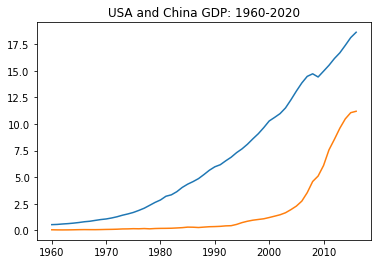

In [ ]:
fig, ax = plt.subplots()
usa = df[df['Country Code'] == 'USA']
china = df[df['Country Code'] == 'CHN']
ax.plot(usa['Year'], usa['Value'] / 1_000_000_000_000)
ax.plot(china['Year'], china['Value'] / 1_000_000_000_000)
ax.set_title("USA and China GDP: 1960-2020");

This is an accurate, if uninspiring, data visualization. If I want to use a different built-in stylesheet, I can change it in one line of code.

In [ ]:
plt.style.use('fivethirtyeight')

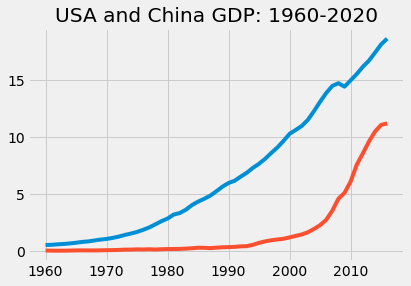

In [ ]:
fig, ax = plt.subplots()
usa = df[df['Country Code'] == 'USA']
china = df[df['Country Code'] == 'CHN']
ax.plot(usa['Year'], usa['Value'] / 1_000_000_000_000)
ax.plot(china['Year'], china['Value'] / 1_000_000_000_000)
ax.set_title("USA and China GDP: 1960-2020");

Changing the stylesheet to the default is again just one line of code.

In [ ]:
plt.style.use('default')

This FiveThirtyEight style was created in the style of the data blog of the same name. While this is arguably a bit better, it still leaves more to be desired. By the end of the article our plot will look like this:

![](rising_above.png)

This is a massive difference from our default plot. Let's dig into stylesheets!

## Stylesheets

Stylesheets are just plain text files ending in a `.mplstyle` file extension. The lines on the stylesheet tell Matplotlib specific settings that change the plot's look, like color, font size, gridlines, and more. A few example lines from the default Matplotlib stylesheet. They call it the default "rc" file, which stands for run commands.

```
# LINES
#lines.linewidth: 1.5               # line width in points
#lines.linestyle: -                 # solid line
#lines.color: C0                    # has no affect on plot(); see axes.prop_cycle
#lines.marker: None                 # the default marker
```

You can find the default stylesheet [here](https://matplotlib.org/stable/tutorials/introductory/customizing.html#the-default-matplotlibrc-file). This is a large, but not exhaustive, list of customizations you can make. I've already done the work of creating a final stylesheet, which you can find at the bottom of the article. 

If you want to see an exhaustive list of `rcparams` you can use the the following code:

``` python
import matplotlib as mpl
mpl.rcParams.keys()
```

This will return a long list you can scroll through. Most of these are documented on the linked Matplotlib documentation page above.

## Building a Stylesheet

To illustrate how stylesheets, I will add in sections of the stylesheet at a time so we can see how it changes the plot. We will do this using `rcparams`, which are a way to modify styles with code instead of the stylesheet. They are functionally the same, with the added benefit of seeing line by line how they work.

### Prop Cycler

The [prop cycler](https://matplotlib.org/stable/tutorials/intermediate/color_cycle.html) tells Matplotlib properties (like color or line style) for each subsequent call to plot. In the stylesheet it looks like this.

```
# Set custom colors. All colors are in web style hex format.
axes.prop_cycle: cycler('color', ['1879CE', 'FC4F30', '3EBCD2', '379A8B', 'EBB434', '758D99'])
```

Choosing a good set of colors for your plots is essential. Beyond just making your plots look better, these colors can become a noticeable feature of the "brand" of your visualizations.

If we want to specify `rcparam` directly in code we can do so like below. In this case we also need to import the `cycler` class.

In [ ]:
from cycler import cycler
import matplotlib as mpl

mpl.rcParams['axes.prop_cycle'] = cycler(color=['#1879CE', '#FC4F30', '#3EBCD2', '#379A8B', '#EBB434', '#758D99'])

Now we can see that the color of the two lines corresponds to the first two colors in our prop cycler. 

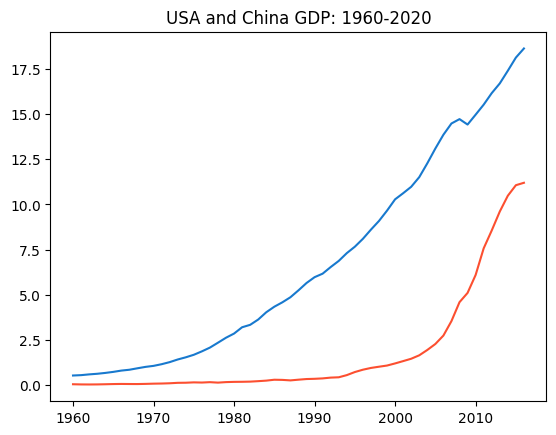

In [ ]:
fig, ax = plt.subplots()
usa = df[df['Country Code'] == 'USA']
china = df[df['Country Code'] == 'CHN']
ax.plot(usa['Year'], usa['Value'] / 1_000_000_000_000)
ax.plot(china['Year'], china['Value'] / 1_000_000_000_000)
ax.set_title("USA and China GDP: 1960-2020");

### Spines and Line Style

Spines are the box that goes around the plot area. There are top, left, right, and bottom spines. The default style includes all spines, which are the solid black lines around the plot. These lines are extra, though, and we can remove the top and right ones to make the plot feel more open.

We will also set our line width. It's a bit thin to be by default. Also, we change the capstyle of the line to be "butt". This makes the line stop exactly where the data says it should. We could change this to round the end of our lines, but I prefer the precision.

```
# Style spines
axes.linewidth: 1               # Spine edge line width
axes.spines.top: False          # Display axis spines (True or False)
axes.spines.left: True          # We only want the left and bottom spines
axes.spines.right: False
axes.spines.bottom: True

# Set line styling for line plots
lines.linewidth: 4              # line width in points
lines.solid_capstyle: butt      # Makes a square ending of the line stopping at datapoint
```

And in code:

In [ ]:
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = True

mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.solid_capstyle'] = 'butt'

Our plot is already looking better. The thicker lines are very noticeable now. These may look too thick right now, but when we increase the size of our plot later it will look more appropriate.

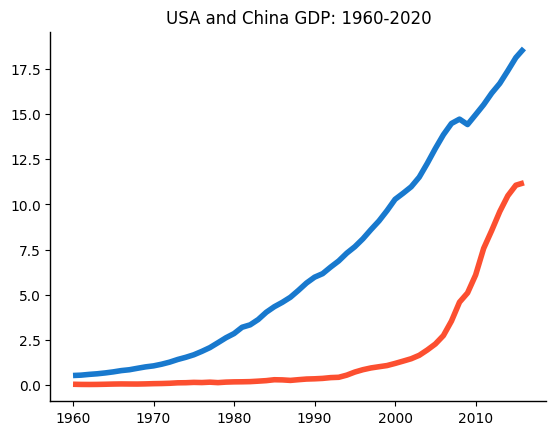

In [ ]:
fig, ax = plt.subplots()
usa = df[df['Country Code'] == 'USA']
china = df[df['Country Code'] == 'CHN']
ax.plot(usa['Year'], usa['Value'] / 1_000_000_000_000)
ax.plot(china['Year'], china['Value'] / 1_000_000_000_000)
ax.set_title("USA and China GDP: 1960-2020");

### Grid Style

The grid is the set of lines vertically and horizontally inside the plot area. These can make it easier to judge the values of your data in the center of the plot. The grid is off by default. 

Personally, I like the grid, but only on one axis. Having both a vertical and horizontal grid creates a busy look that can be distracting.

```
# Grid style
axes.grid: true                 # display grid or not
axes.grid.axis: y               # which axis the grid should apply to          
grid.linewidth: 1               # in points
grid.color: A5A5A5              # grid color
axes.axisbelow: True            # Sets axis gridlines below lines and patches.
```

And the code to set these:

In [ ]:
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.axis'] = 'y'
mpl.rcParams['grid.linewidth'] = 1
mpl.rcParams['grid.color'] = '#A5A5A5'
mpl.rcParams['axes.axisbelow'] = True

Our plot now has horizontal gridlines along the y-axis. These help orient your eye when trying to see the values of the plotted lines farther away from the axis. Some may prefer to not have these gridlines, and these options are easily editable in a stylesheet.

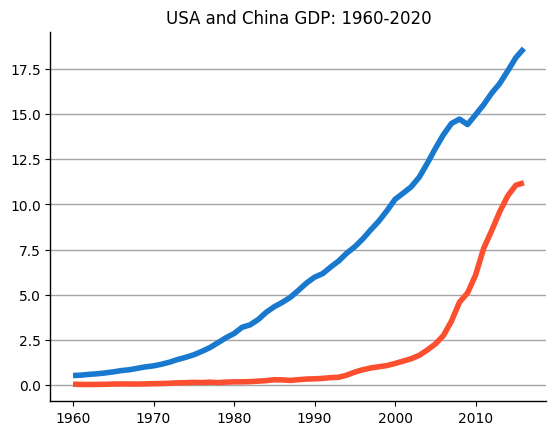

In [ ]:
fig, ax = plt.subplots()
usa = df[df['Country Code'] == 'USA']
china = df[df['Country Code'] == 'CHN']
ax.plot(usa['Year'], usa['Value'] / 1_000_000_000_000)
ax.plot(china['Year'], china['Value'] / 1_000_000_000_000)
ax.set_title("USA and China GDP: 1960-2020");

### DPI and Figure Spacing

One of the biggest issues with Matplotlib is the low resolution of the default plotting style. Luckily you can set both the figure size and DPI (dots per inch) of the plot.

The default figure DPI is 100. This isn't terrible, but it gives a noticeable blurry quality on most screens. Setting this to 150 makes it easier on the eyes in your IDE. I found that in some IDEs like JupyterLab, setting the plotting DPI to 300 or higher increases the size of the plot on the screen. This is a weird quirk, but it's something you may need to change lower if you have this issue.

I set the save DPI to 300. This results in a print quality file that looks great when zoomed in. You can make this even higher, but it will also give a correspondingly larger file size.

The figure size is a tricky one to set in a stylesheet. Figure sizes are set in inches in Matplotlib. If you are reading this outside the United States, I'm sorry. This is a throwback to the days of printing plots on paper.

Default Matplotlib plots are almost square (actually, it's a 4:3 aspect ratio, 6.4x4.8 inches). This is nice because a line with a slope of 1 will go up at a little less than 45 degrees. Making the plot wider will reduce that angle. Depending on the data you are plotting, you may want to change the aspect ratio.

In the days of smartphones, it's a good idea for visualizations to work on many screen types. A very wide image won't look good on a vertical phone screen. I chose a figure size of 16x11. This is almost a widescreen format for a monitor, but when the title and footer are added later, the exported image will be in nearly a 4:3 aspect ratio.

```
# Set spacing for figure and also DPI.
figure.subplot.left: 0.08       # the left side of the subplots of the figure
figure.subplot.right: 0.95      # the right side of the subplots of the figure
figure.subplot.bottom: 0.07     # the bottom of the subplots of the figure
figure.figsize: 16, 11          # figure size in inches
figure.dpi: 150                 # figure dots per inch

# Properties for saving the figure. Ensure a high DPI when saving so we have a good resolution.
savefig.dpi:       300          # figure dots per inch or 'figure'
savefig.facecolor: white        # figure face color when saving
savefig.bbox:      tight        # {tight, standard}
savefig.pad_inches:   0.2       # padding when bbox is set to tight

# Legend Styling
legend.framealpha: 1
```

And the code:

In [ ]:
# Set spacing for figure and also DPI.
mpl.rcParams['figure.subplot.left'] = 0.08
mpl.rcParams['figure.subplot.right'] = 0.95
mpl.rcParams['figure.subplot.bottom'] = 0.07
mpl.rcParams['figure.figsize'] = 16, 11
mpl.rcParams['figure.dpi'] = 150

# Properties for saving the figure.
# Ensure a high DPI when saving so we have a good resolution.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.facecolor'] = 'white'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.2

# Legend Styling
mpl.rcParams['legend.framealpha'] = 1

Now our plot is much higher resolution. There is more breathing room for the plotted data. Unfortunately, our text is now tiny. In the next part of our stylesheet we will make these bigger.

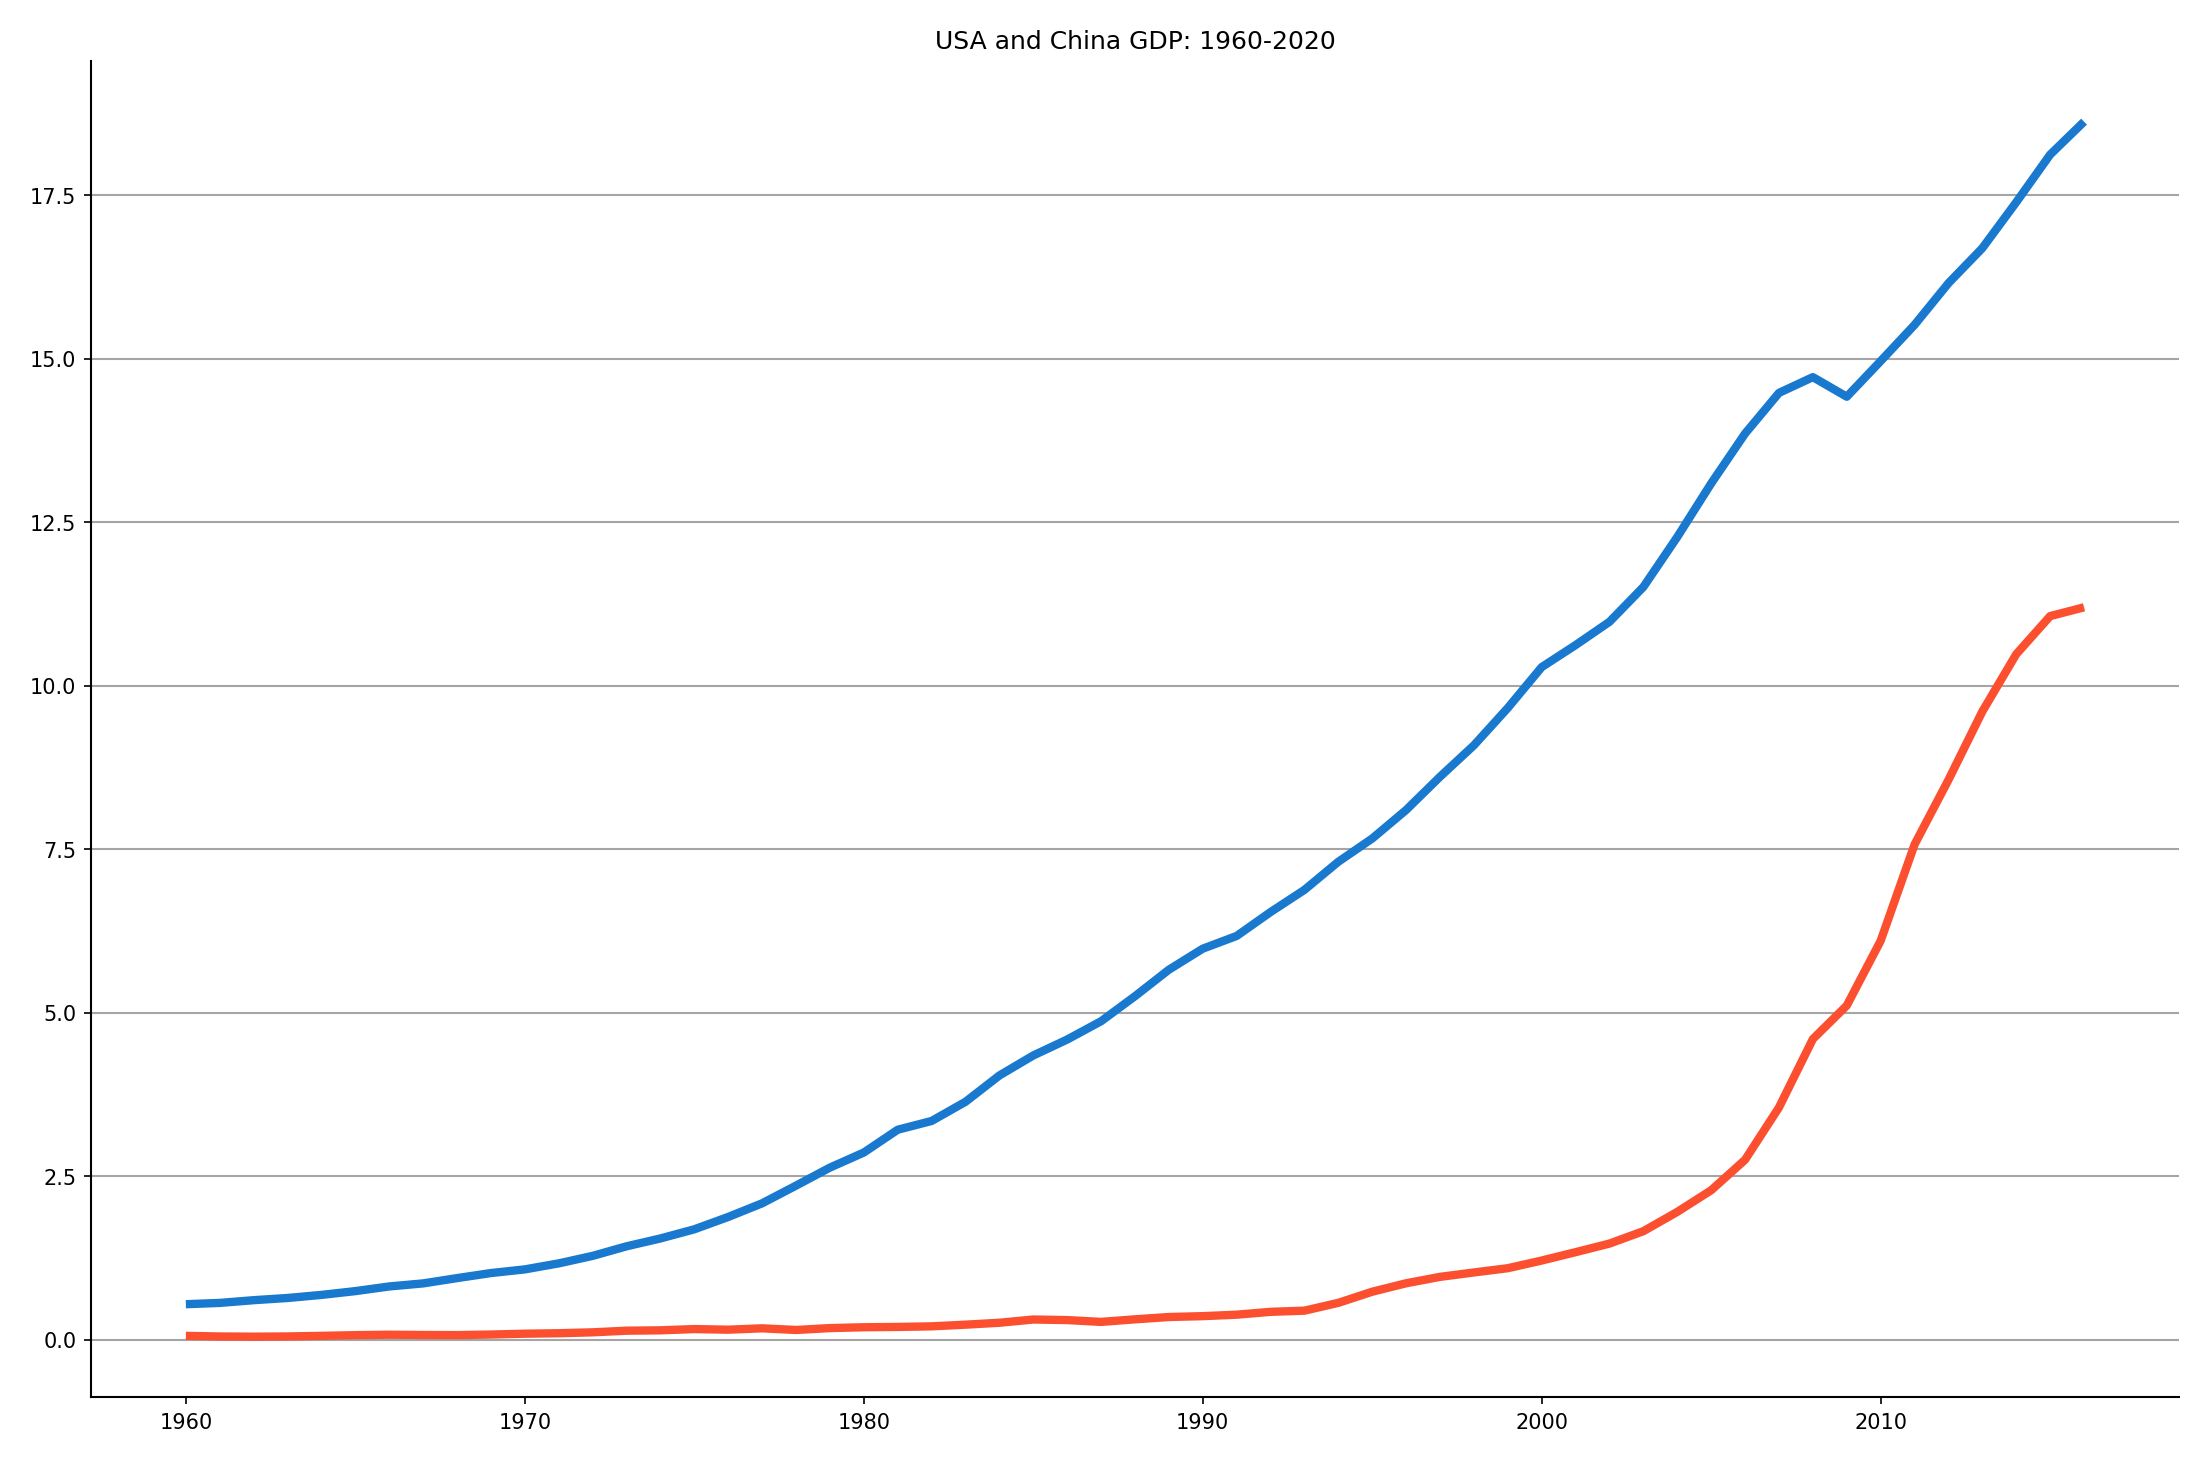

In [ ]:
fig, ax = plt.subplots()
usa = df[df['Country Code'] == 'USA']
china = df[df['Country Code'] == 'CHN']
ax.plot(usa['Year'], usa['Value'] / 1_000_000_000_000)
ax.plot(china['Year'], china['Value'] / 1_000_000_000_000)
ax.set_title("USA and China GDP: 1960-2020");

### Ticks, Tick Labels, and Font Sizes

Ticks are the little lines coming out of the plot on the X and Y axis. They point towards the tick labels, which in this case are years and GDP numbers. These may seem like small details, but these small changes can add up and give your visualization a distinctive look. 

In addition, font sizes are very important. The text should be easily read without being distracting. When increasing the size of our plot we saw that all of the text in the plot became smaller. We will go ahead and punch these up higher and set our tick labels to be 18 point and the title to 28.

The title padding tells Matplotlib how much spacing above the plot to place the title. I added a bit of space here to make room for a subtitle that I will add later in the article. 

I also like the title to be on the left side of the plot. Lots of research using eye tracking software tells us that the top left corner is viewed first. Placing the title in the center will ignore that natural tendency and force you to move over to read. Taking that tiny friction away is a small way to improve your visualization.

```
# Setting font sizes and spacing
axes.labelsize: 18              # font size of the x and y labels
xtick.labelsize: 18             # font size of the x tick labels      
ytick.labelsize: 18             # font size of the y tick labels
font.size: 18                   # default font size for text, given in points.
xtick.major.pad: 8              # distance to major tick label in points  
ytick.major.pad: 12             # distance to major tick label in points

# Title styling
axes.titlelocation: left        # alignment of the title: {left, right, center}
axes.titlepad: 20               # pad between axes and title in points
axes.titlesize: 28              # font size of the axes title
axes.titleweight: bold          # font weight of title

# Remove major and minor ticks except for on the x-axis.
xtick.major.size: 5             # major tick size in points
xtick.minor.size: 0             # minor tick size in points
ytick.major.size: 0
ytick.minor.size: 0
```

And the code:

In [ ]:
# Setting font sizes and spacing
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['font.size'] = 18
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['ytick.major.pad'] = 12

# Title styling
mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlepad'] = 20
mpl.rcParams['axes.titlesize'] = 28
mpl.rcParams['axes.titleweight'] = 'bold'

# Remove major and minor ticks except for on the x-axis.
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 0
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.minor.size'] = 0

At this point our plot looks pretty good. Let's put it all together and make a stylesheet!

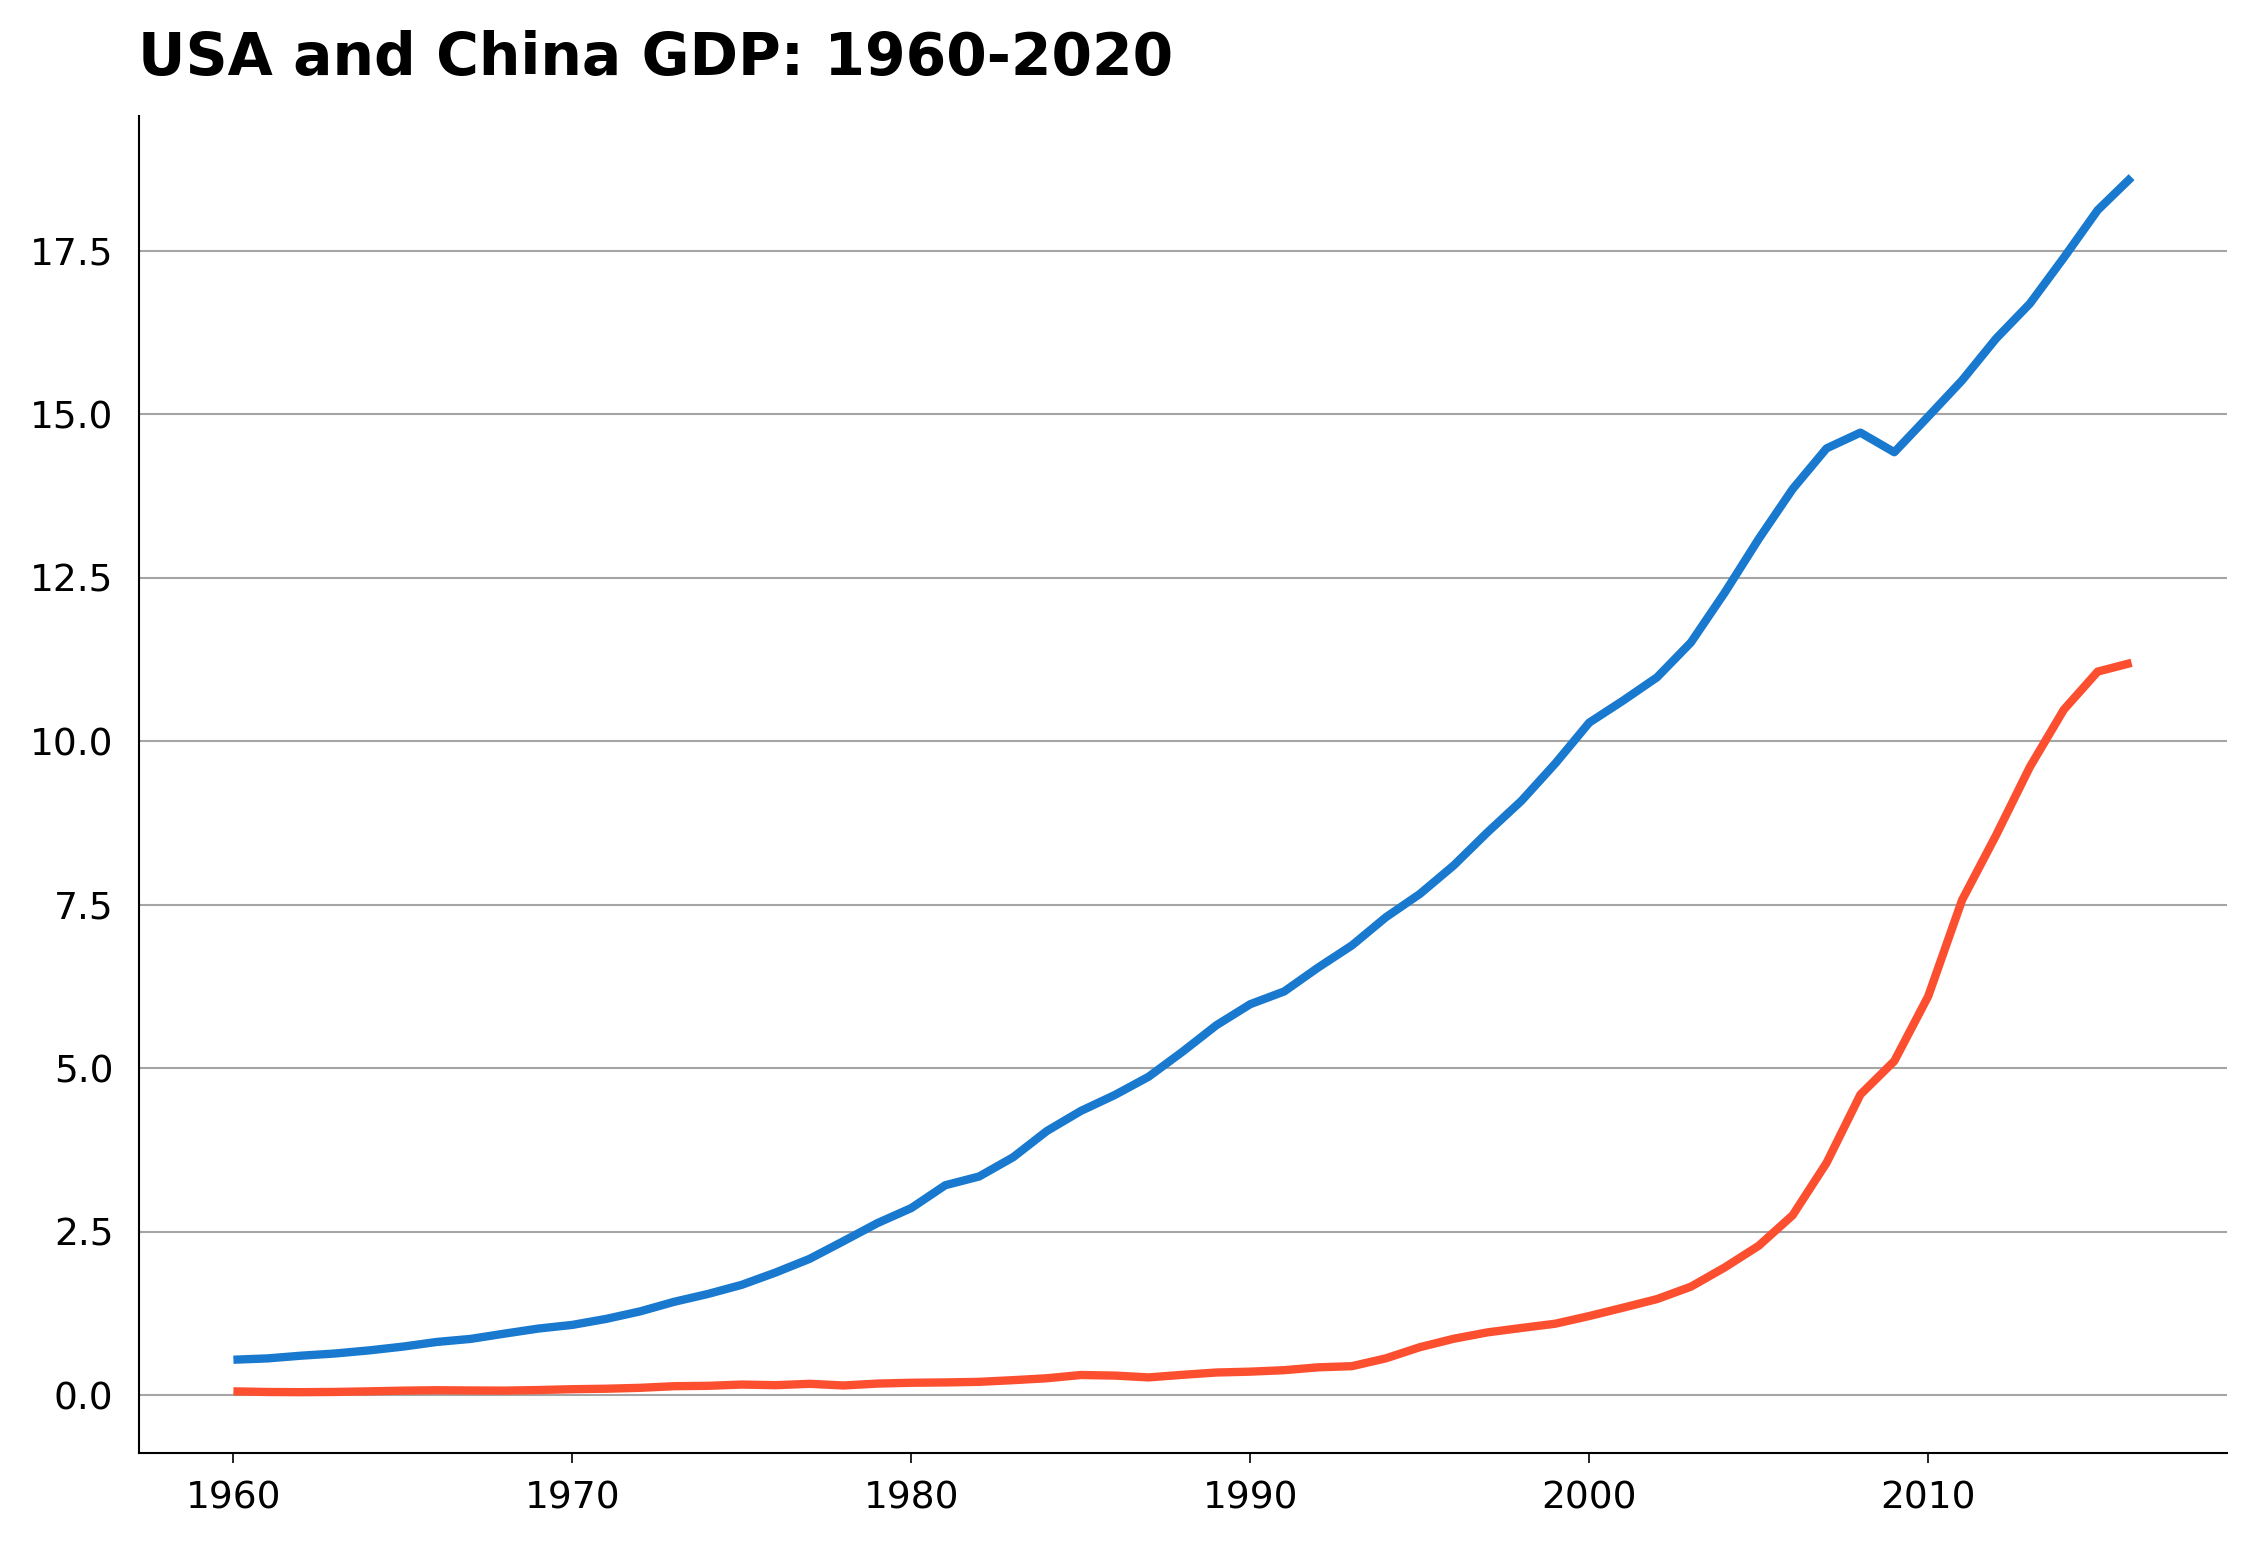

In [ ]:
fig, ax = plt.subplots()
usa = df[df['Country Code'] == 'USA']
china = df[df['Country Code'] == 'CHN']
ax.plot(usa['Year'], usa['Value'] / 1_000_000_000_000)
ax.plot(china['Year'], china['Value'] / 1_000_000_000_000)
ax.set_title("USA and China GDP: 1960-2020");

## The Datafantic Stylesheet

It was a lot to get here, but the beauty of stylesheets is that all of the work above can be done and imported in one line of code.

Using my preferences for styling, I created a complete stylesheet called datafantic.mplstyle. This is simply all of the rcparam lines above added into one file.

The beauty of the stylesheet is that with one line, all of these preferences can be set, removing the need for lots of copy-pasting of code in each new notebook.

```
# Set custom colors. All colors are in web style hex format.
axes.prop_cycle: cycler('color', ['1879CE', 'FC4F30', '3EBCD2', '379A8B', 'EBB434', '758D99'])


# Style spines
axes.linewidth: 1               # Spine edge line width
axes.spines.top: False          # Display axis spines (True or False)
axes.spines.left: True          # We only want the left and bottom spines
axes.spines.right: False
axes.spines.bottom: True

# Set line styling for line plots
lines.linewidth: 4              # line width in points
lines.solid_capstyle: butt      # Makes a square ending of the line stopping at datapoint

# Grid style
axes.grid: true                 # display grid or not
axes.grid.axis: y               # which axis the grid should apply to          
grid.linewidth: 1               # in points
grid.color: A5A5A5              # grid color
axes.axisbelow: True            # Sets axis gridlines below lines and patches.

# Setting font sizes and spacing
axes.labelsize: 18              # font size of the x and y labels
xtick.labelsize: 18             # font size of the x tick labels      
ytick.labelsize: 18             # font size of the y tick labels
font.size: 18                   # default font size for text, given in points.
xtick.major.pad: 8              # distance to major tick label in points  
ytick.major.pad: 12             # distance to major tick label in points

# Title styling
axes.titlelocation: left        # alignment of the title: {left, right, center}
axes.titlepad: 20               # pad between axes and title in points
axes.titlesize: 28              # font size of the axes title
axes.titleweight: bold          # font weight of title

# Remove major and minor ticks except for on the x-axis.
xtick.major.size: 5             # major tick size in points
xtick.minor.size: 0             # minor tick size in points
ytick.major.size: 0
ytick.minor.size: 0

# Set spacing for figure and also DPI.
figure.subplot.left: 0.08       # the left side of the subplots of the figure
figure.subplot.right: 0.95      # the right side of the subplots of the figure
figure.subplot.bottom: 0.07     # the bottom of the subplots of the figure
figure.figsize: 16, 11          # figure size in inches
figure.dpi: 150                 # figure dots per inch

# Properties for saving the figure. Ensure a high DPI when saving so we have a good resolution.
savefig.dpi:       300          # figure dots per inch or 'figure'
savefig.facecolor: white        # figure face color when saving
savefig.bbox:      tight        # {tight, standard}
savefig.pad_inches:   0.2       # padding when bbox is set to tight

# Legend Styling
legend.framealpha: 1
```

Let's set our stylesheet and see how it looks on our plot. 

In [ ]:
plt.style.use('datafantic.mplstyle')

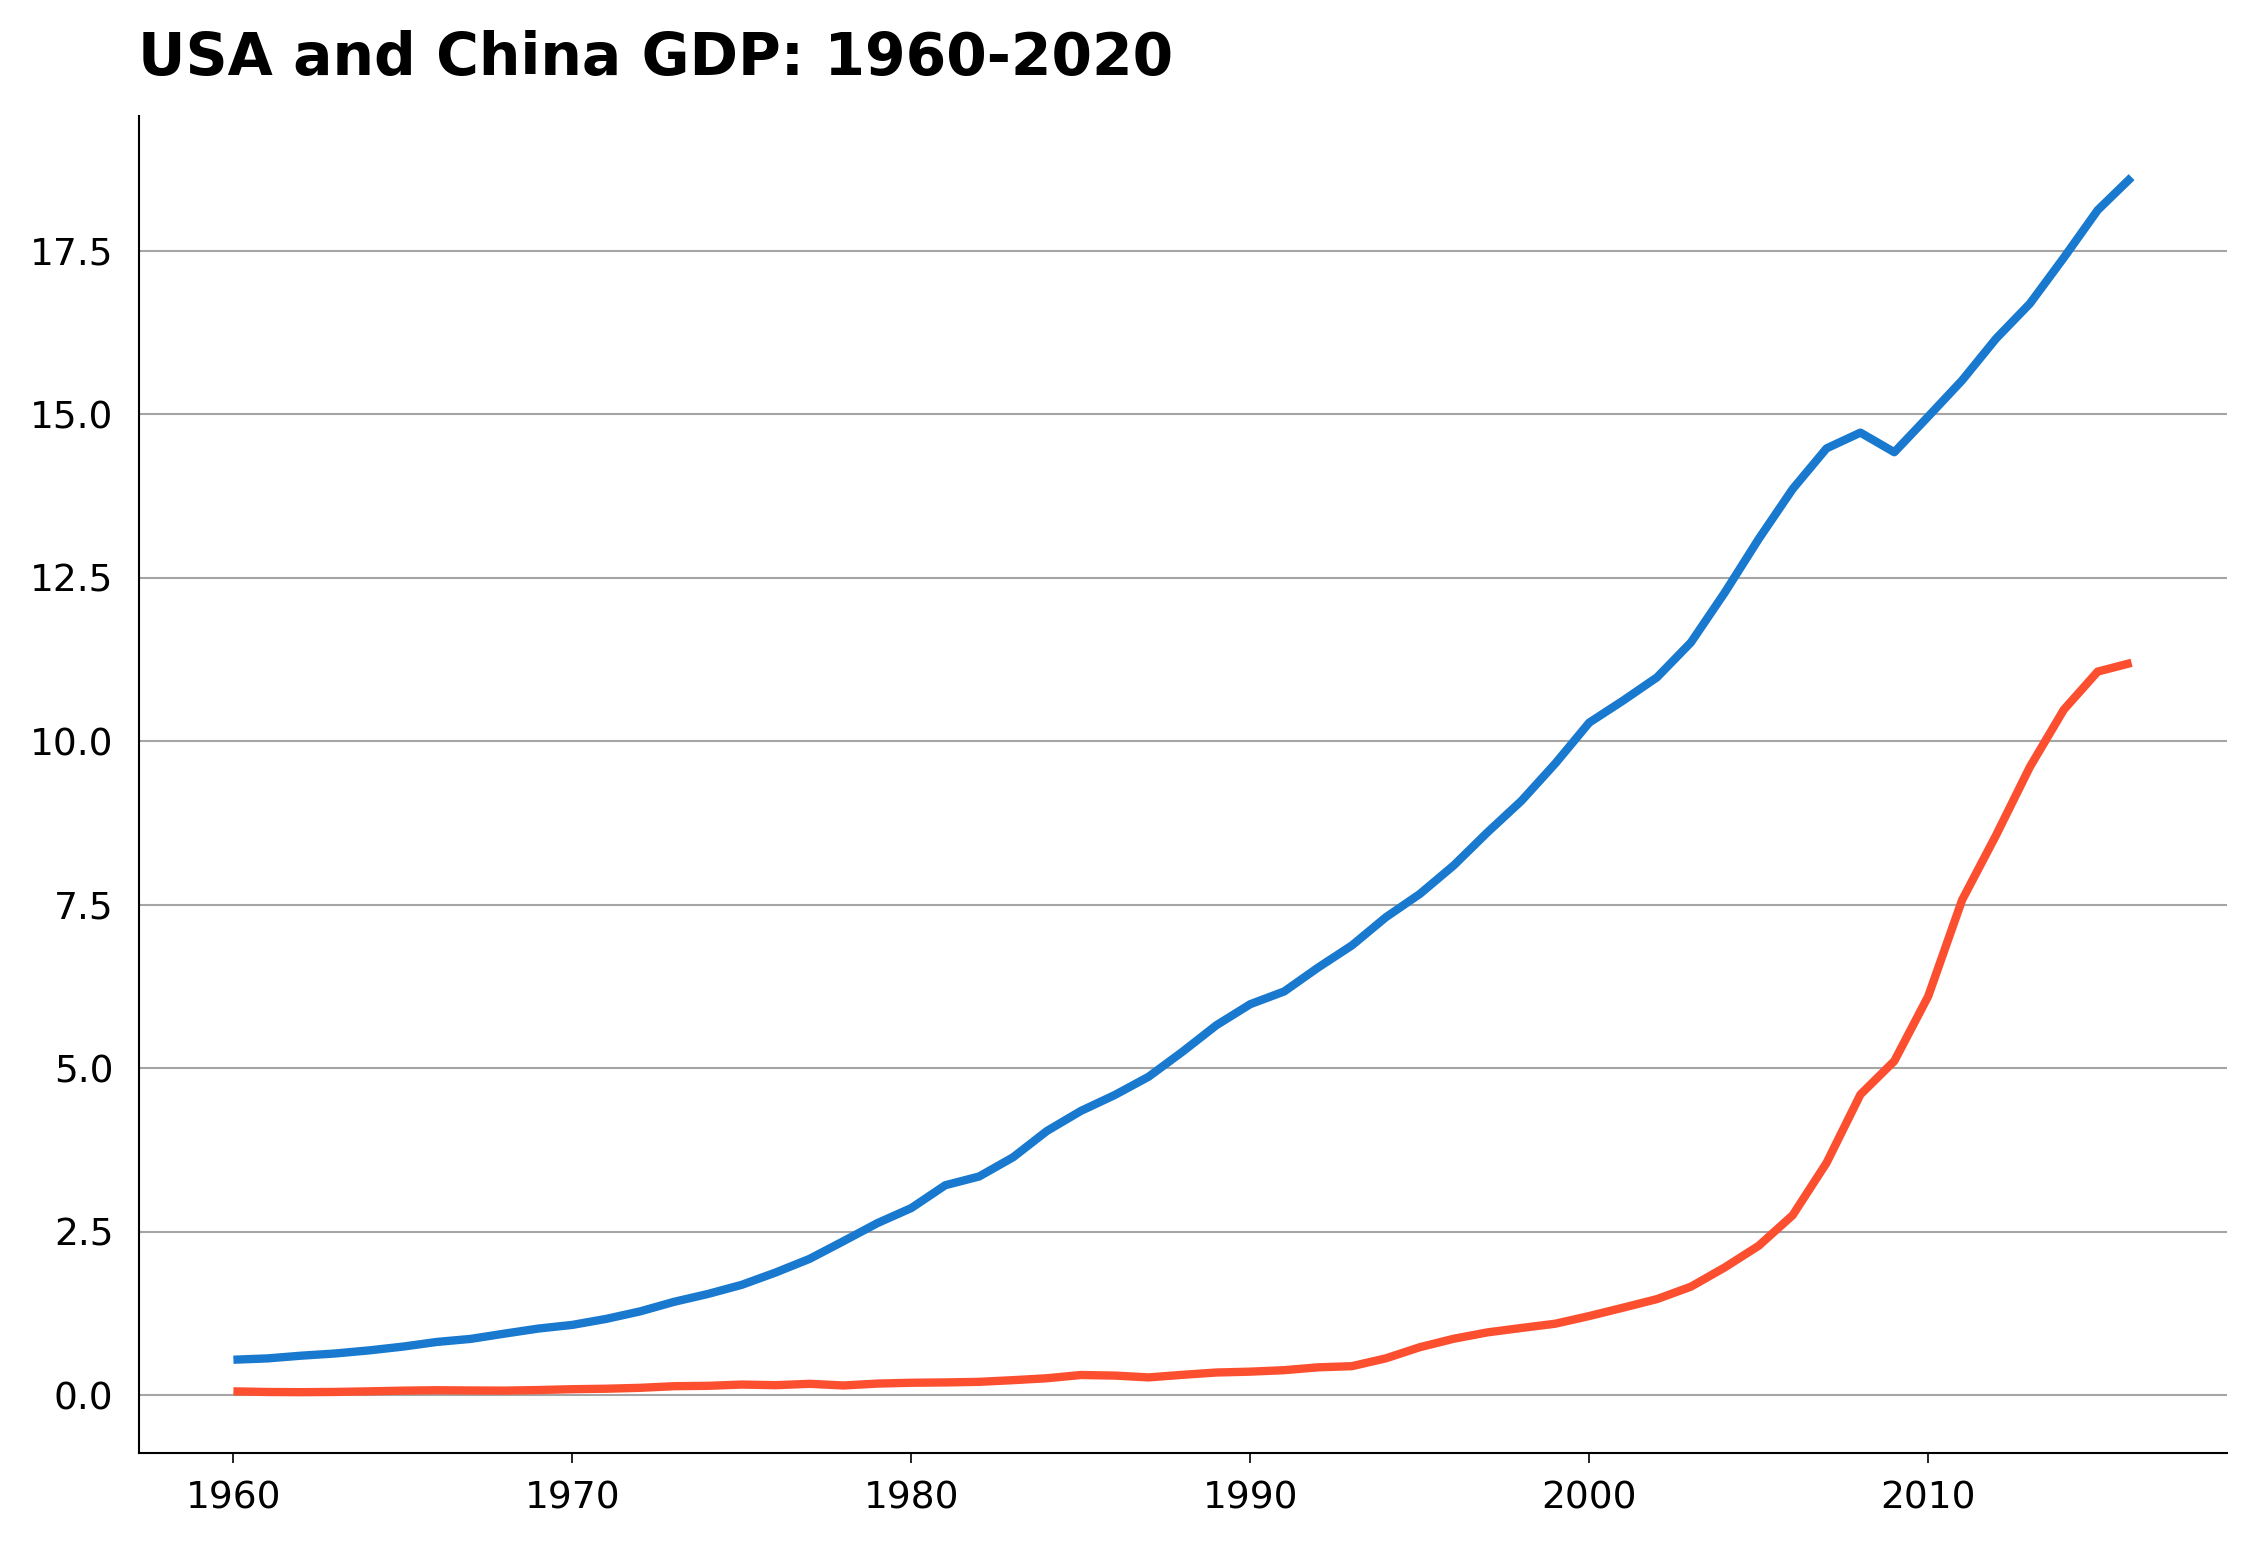

In [ ]:
fig, ax = plt.subplots()
usa = df[df['Country Code'] == 'USA']
china = df[df['Country Code'] == 'CHN']
ax.plot(usa['Year'], usa['Value'] / 1_000_000_000_000)
ax.plot(china['Year'], china['Value'] / 1_000_000_000_000)
ax.set_title("USA and China GDP: 1960-2020");

Overall, it's a much cleaner look than the default plot. In addition, setting the DPI and the figure size makes everything much sharper (and bigger). We are missing a legend still, and there is still more to be done to make this plot ready to be published. It's a good start though!

## Using a Different Style

I'm a big fan of the Economist style of data visualization. One design principle they use for their line plots is to put the y-axis labels on the right side. Since line plots are often time based, it makes sense that we can about the right side of the plot more than the left. It's the most recent data and also our starting point of comparison. 

So let's move the y-axis labels to the right. This will also eliminate the need for the y-axis spine (the vertical line). I created another stylesheet called `datafantic-right.mplstyle` that does these things. 

```
# Set custom colors. All colors are in web style hex format.
axes.prop_cycle: cycler('color', ['1879CE', 'FC4F30', '3EBCD2', '379A8B', 'EBB434', '758D99'])


# Style spines
axes.linewidth: 1               # Spine edge line width
axes.spines.top: False          # Display axis spines (True or False)
axes.spines.left: False         # We only want the bottom spines
axes.spines.right: False
axes.spines.bottom: True

# Set line styling for line plots
lines.linewidth: 4              # line width in points
lines.solid_capstyle: butt      # Makes a square ending of the line stopping at datapoint

# Grid style
axes.grid: true                 # display grid or not
axes.grid.axis: y               # which axis the grid should apply to          
grid.linewidth: 1               # in points
grid.color: A5A5A5              # grid color
axes.axisbelow: True            # Sets axis gridlines below lines and patches.

# Move tick labels to right side
ytick.labelleft: False          # draw tick labels on the left side
ytick.labelright: True          # draw tick labels on the right side
ytick.alignment: bottom         # alignment of yticks

# Setting font sizes and spacing
axes.labelsize: 18              # font size of the x and y labels
xtick.labelsize: 18             # font size of the x tick labels      
ytick.labelsize: 18             # font size of the y tick labels
font.size: 18                   # default font size for text, given in points.
xtick.major.pad: 8              # distance to major tick label in points  
ytick.major.pad: -40            # distance to major tick label in points

# Remove major and minor ticks except for on the x-axis.
xtick.major.size: 5             # major tick size in points
xtick.minor.size: 0             # minor tick size in points
ytick.major.size: 0
ytick.minor.size: 0

# Title styling
axes.titlelocation: left        # alignment of the title: {left, right, center}
axes.titlepad: 20               # pad between axes and title in points
axes.titlesize: 28              # font size of the axes title
axes.titleweight: bold          # font weight of title

# Set spacing for figure and also DPI.
figure.subplot.left: 0.08       # the left side of the subplots of the figure
figure.subplot.right: 0.95      # the right side of the subplots of the figure
figure.subplot.bottom: 0.07     # the bottom of the subplots of the figure
figure.figsize: 16, 11          # figure size in inches
figure.dpi: 150                 # figure dots per inch

# Properties for saving the figure. Ensure a high DPI when saving so we have a good resolution.
savefig.dpi:       300          # figure dots per inch or 'figure'
savefig.facecolor: white        # figure face color when saving
savefig.bbox:      tight        # {tight, standard}
savefig.pad_inches:   0.2       # padding when bbox is set to tight

# Legend Styling
legend.framealpha: 1
```

Let's set this stylesheet and see how it looks!

In [ ]:
plt.style.use('datafantic-right.mplstyle')

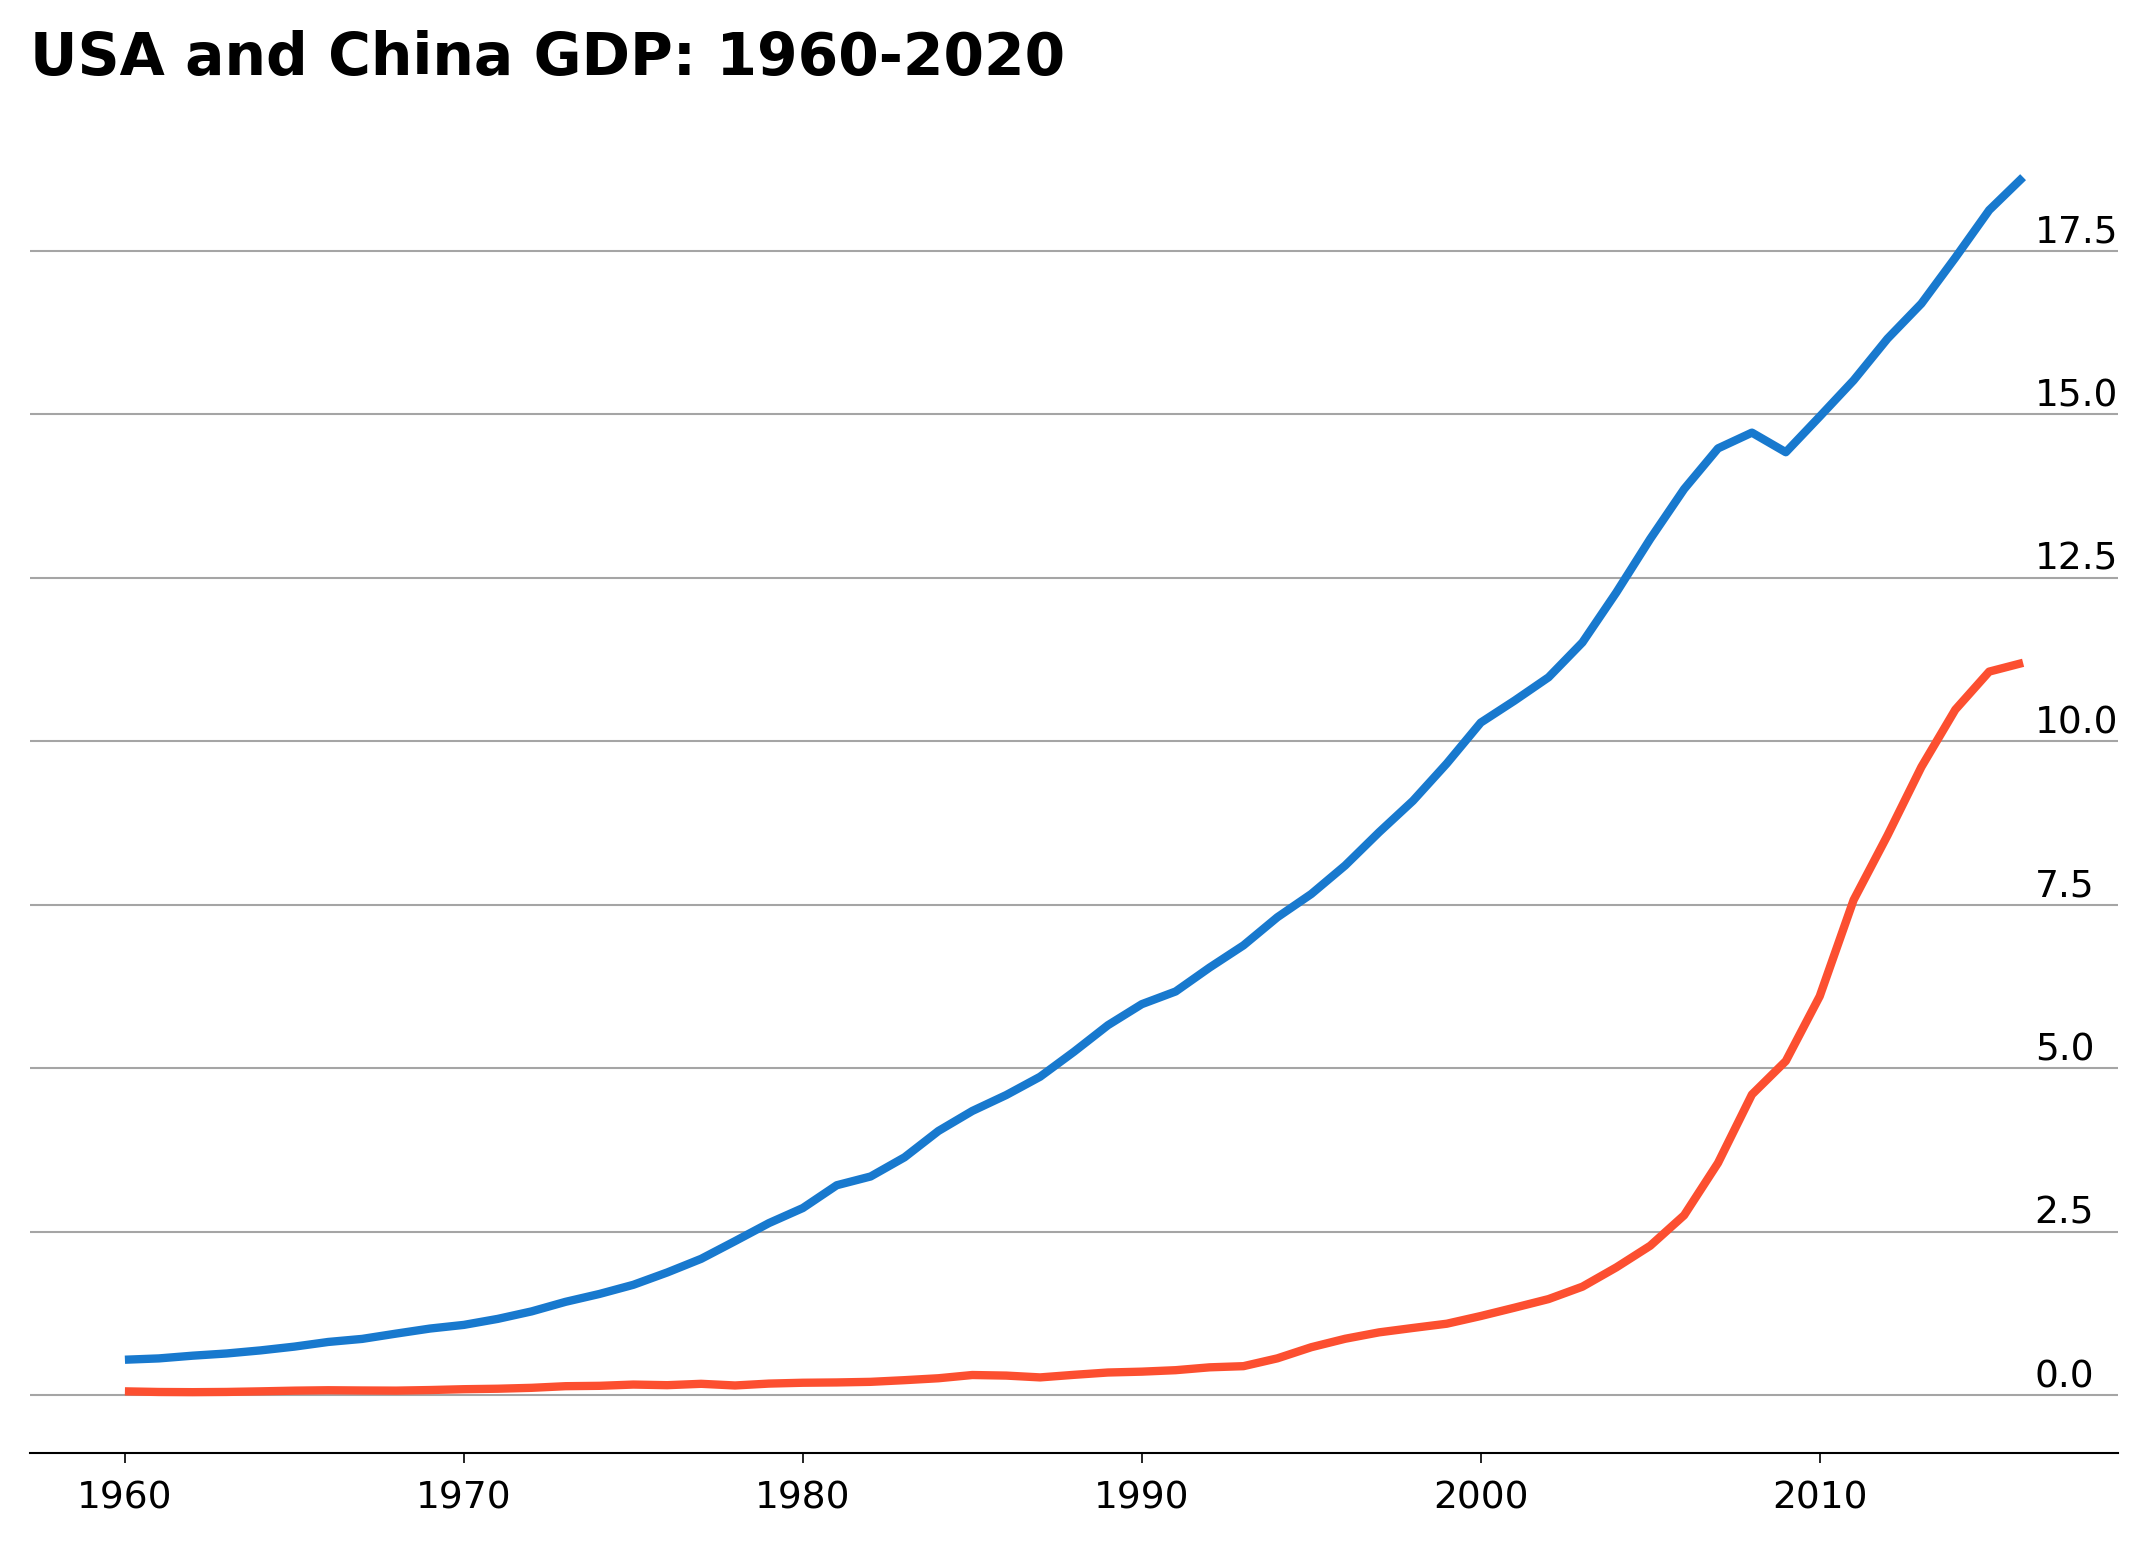

In [ ]:
fig, ax = plt.subplots()
usa = df[df['Country Code'] == 'USA']
china = df[df['Country Code'] == 'CHN']
ax.plot(usa['Year'], usa['Value'] / 1_000_000_000_000)
ax.plot(china['Year'], china['Value'] / 1_000_000_000_000)
ax.set_title("USA and China GDP: 1960-2020");

This looks pretty good, but we are missing a few things we would need in a publishable plot. First, these lines aren't labeled directly or with a legend. Second, the axes don't have labels. This could be done in the subtitle or with direct labels directly on the axes.

Lastly, our y-axis minimum should be 0. It's always a good idea to set your minimum y-axis value to 0 if you are dealing with all positive numbers (i.e. non-negative) so your viewers will get the right scale of your data in mind.

Let's add some more countries into the plot, label the axes, set a legend, and set our y-axis minimum to 0. 

(0.0, 19.55333828204972)

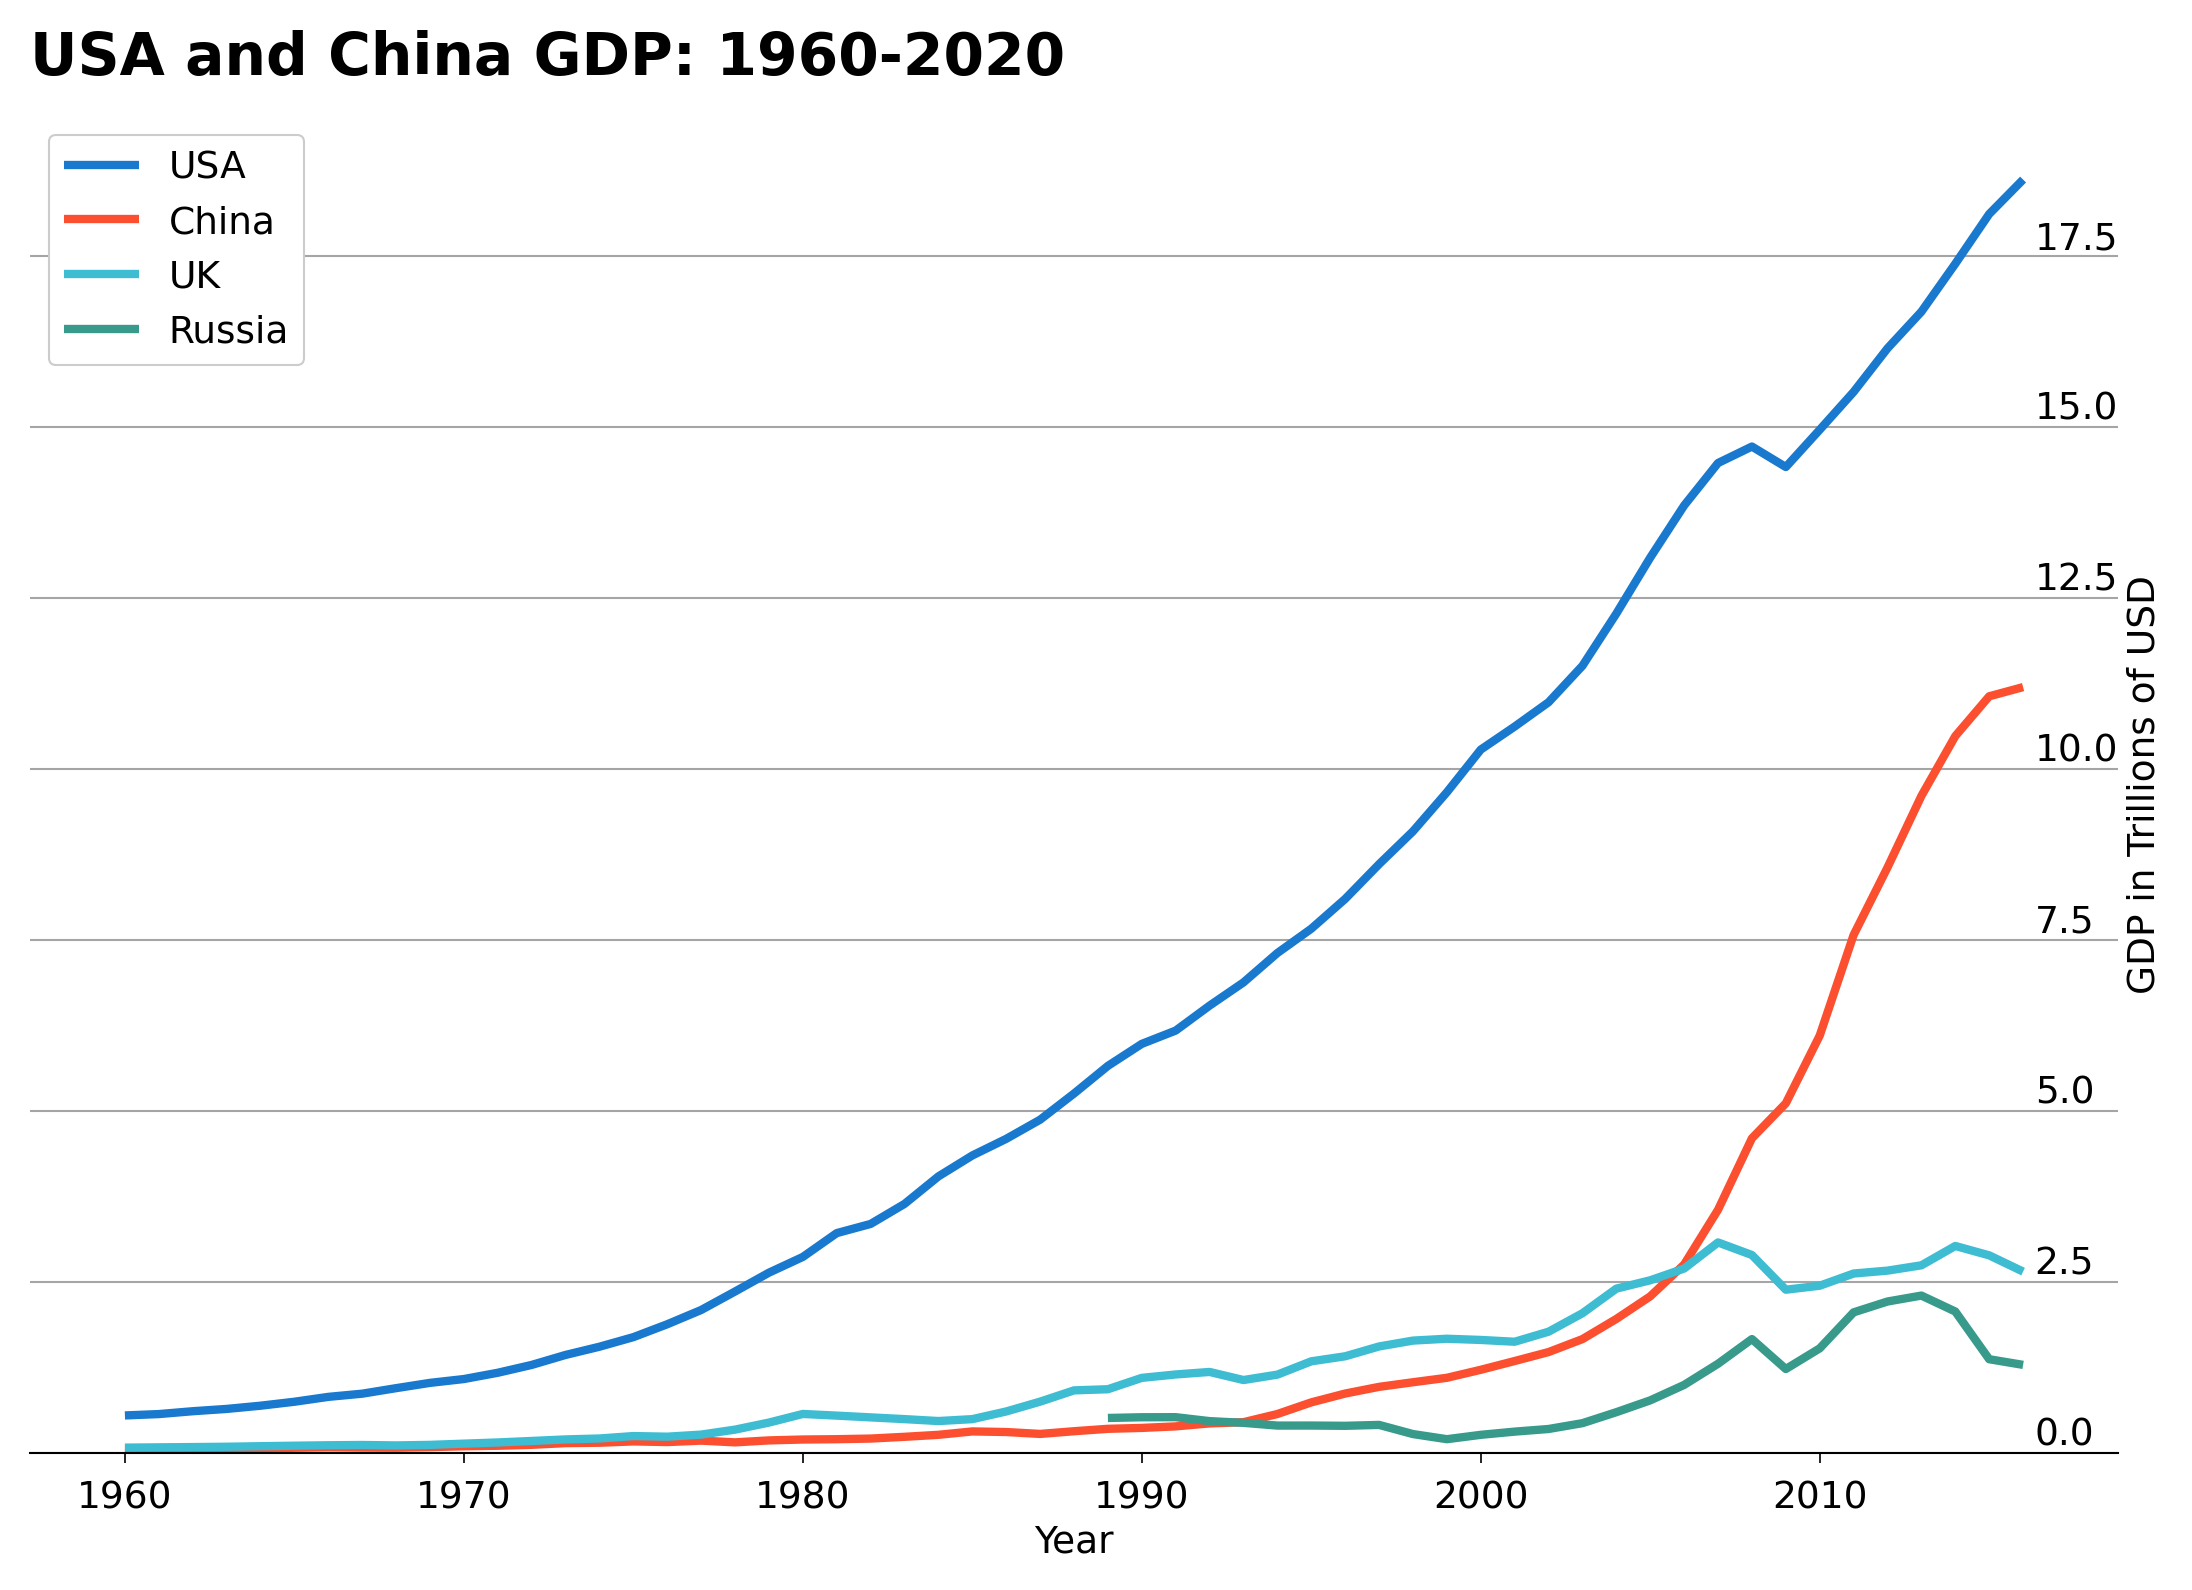

In [ ]:
fig, ax = plt.subplots()
usa = df[df['Country Code'] == 'USA']
china = df[df['Country Code'] == 'CHN']
uk = df[df['Country Code'] == 'GBR']
russia = df[df['Country Code'] == 'RUS']
ax.plot(usa['Year'], usa['Value'] / 1_000_000_000_000, label='USA')
ax.plot(china['Year'], china['Value'] / 1_000_000_000_000, label='China')
ax.plot(uk['Year'], uk['Value'] / 1_000_000_000_000, label='UK')
ax.plot(russia['Year'], russia['Value'] / 1_000_000_000_000, label='Russia')

ax.legend()
ax.set_title("USA and China GDP: 1960-2020")
ax.set_xlabel("Year")
ax.yaxis.set_label_position("right")
ax.set_ylabel("GDP in Trillions of USD")
ax.set_ylim(0)

## Add Some Flair

Now that we have our basic styles down let's add some flair to our plot. There are several changes I would make to the plot above that adds to my own stylistic choices.

- Add a subtitle that describes the data more. This will allow us to drop the x and y axis labels.
- Directly label the lines and remove the legend. This reduces the eye movement and mental overhead to understand which line is which country. 
- Add a footer below the plot with my organization (or logo) and a data source.

Subtitle styling isnt possible with Matplotlib stylesheets, at least not in a way to make it easily line up with your title. This means we need to add a subtitle manually using the `ax.text` function in Matplotlib. This is also the case with the line labels and the footer. 

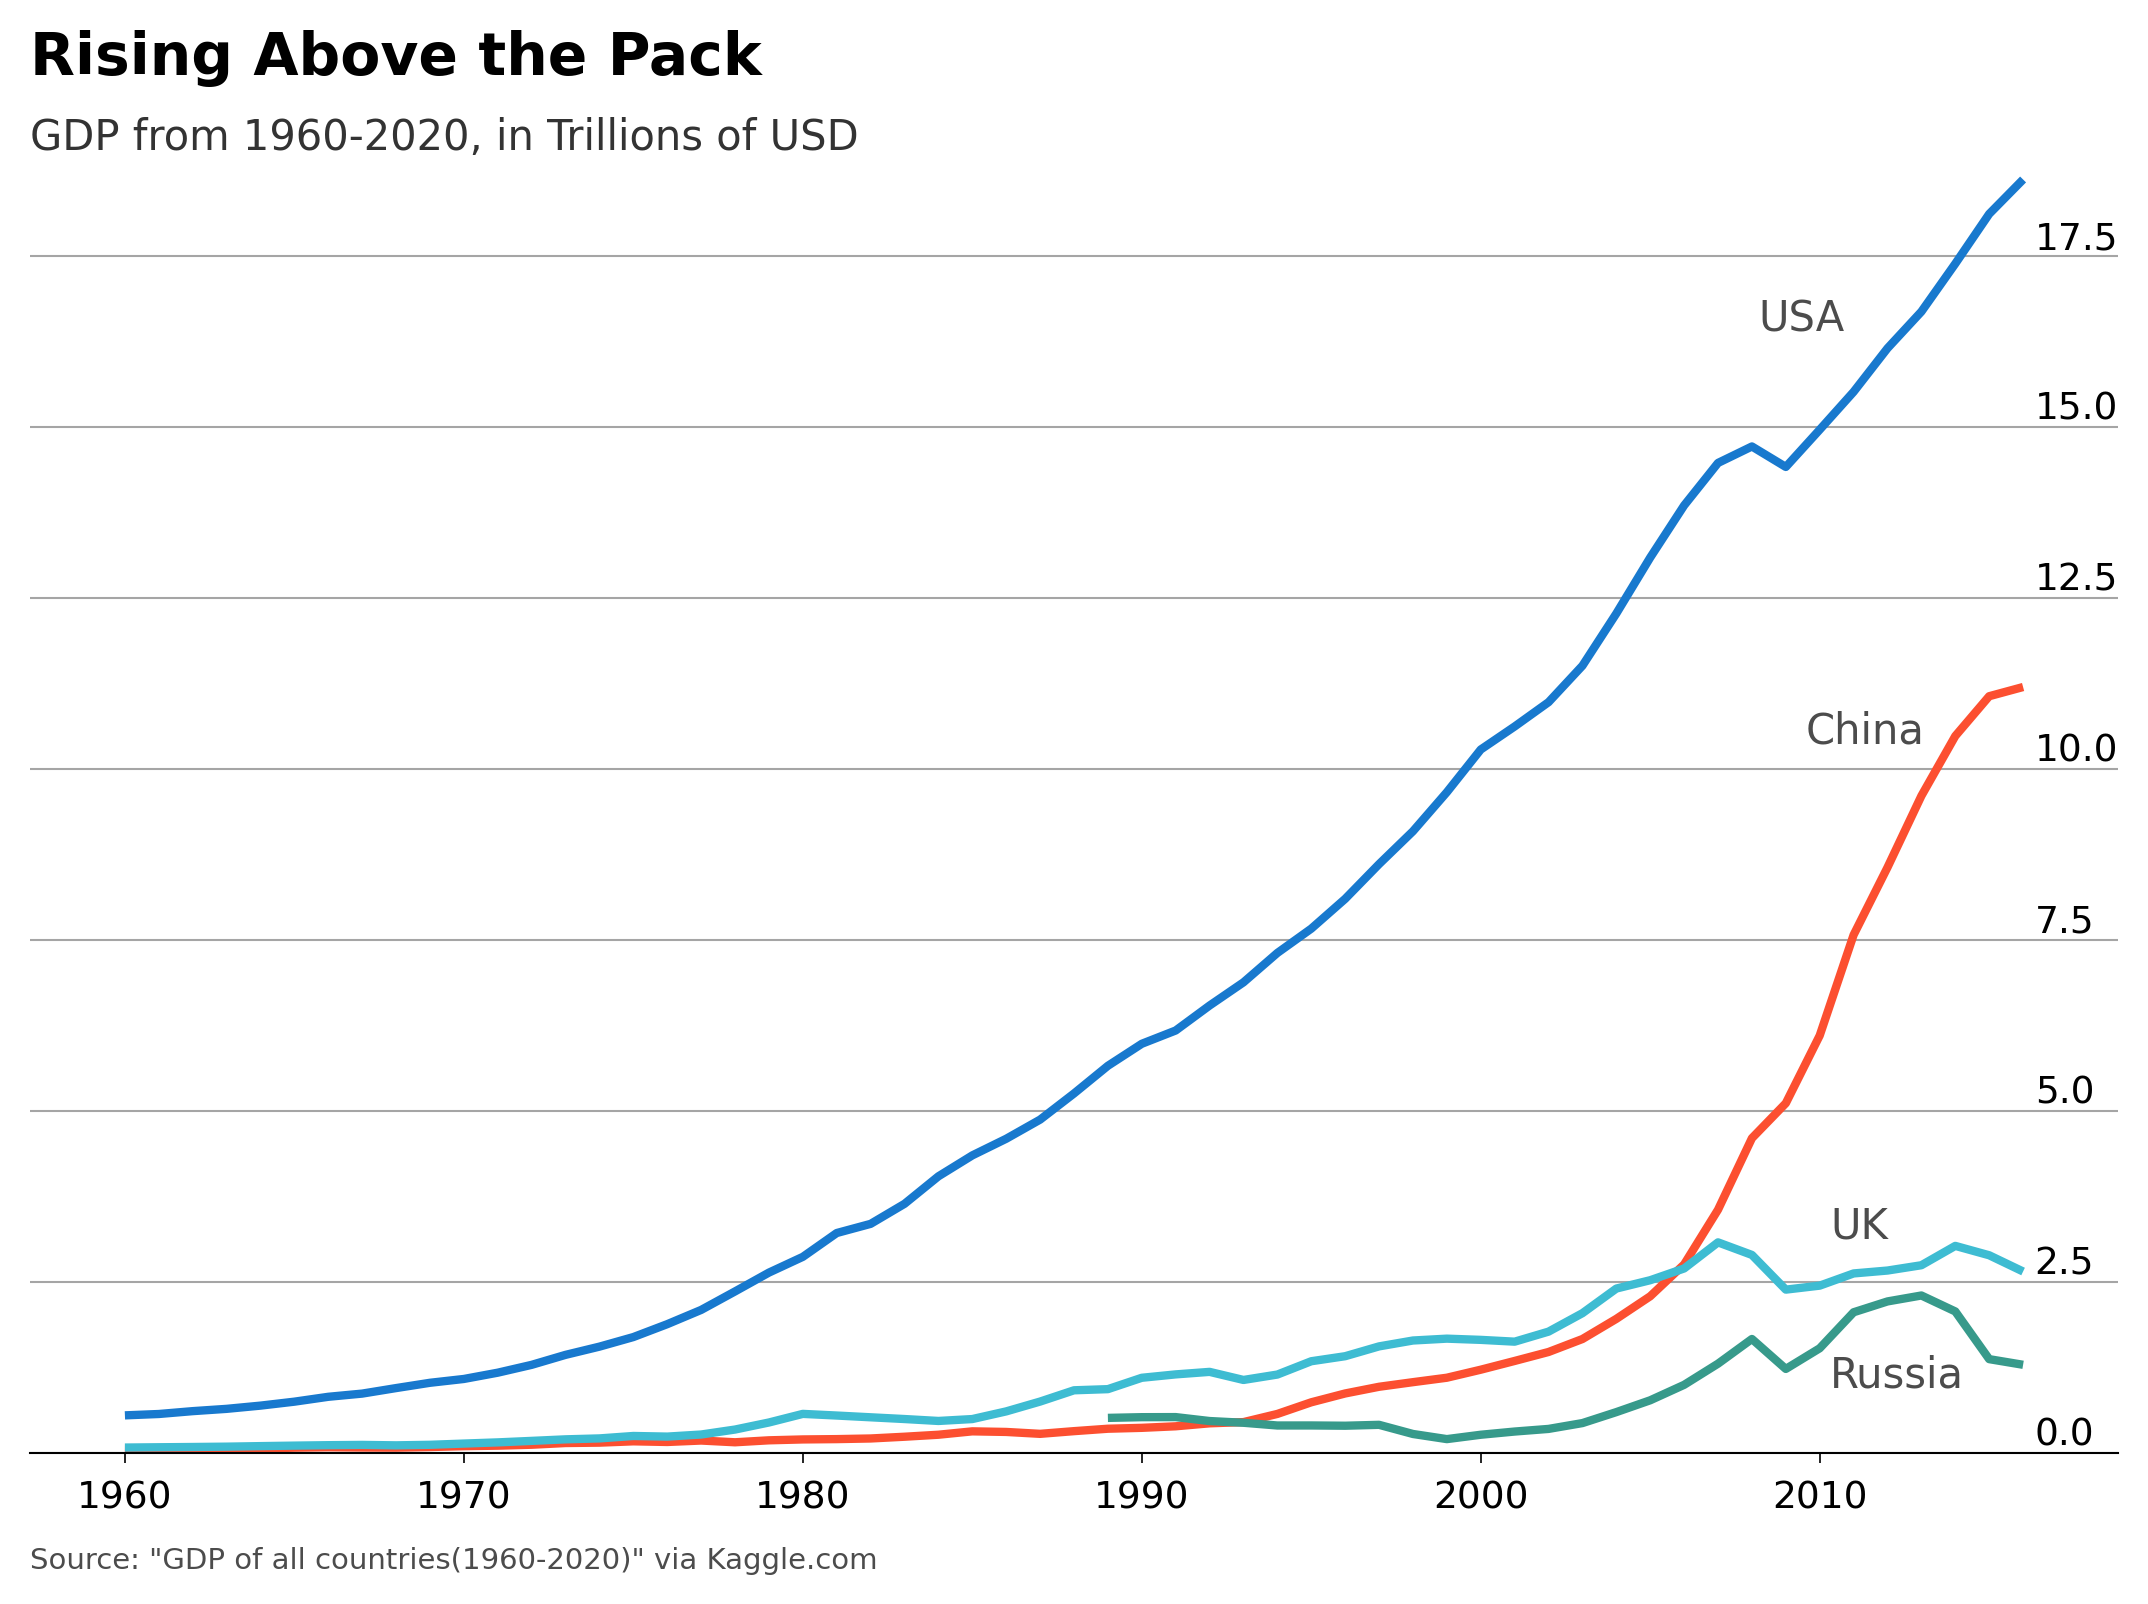

In [ ]:
fig, ax = plt.subplots()
usa = df[df['Country Code'] == 'USA']
china = df[df['Country Code'] == 'CHN']
uk = df[df['Country Code'] == 'GBR']
russia = df[df['Country Code'] == 'RUS']
ax.plot(usa['Year'], usa['Value'] / 1_000_000_000_000, label='USA')
ax.plot(china['Year'], china['Value'] / 1_000_000_000_000, label='China')
ax.plot(uk['Year'], uk['Value'] / 1_000_000_000_000, label='UK')
ax.plot(russia['Year'], russia['Value'] / 1_000_000_000_000, label='Russia')

ax.set_title("Rising Above the Pack")
ax.set_ylim(0)

# Add in title and subtitle
ax.text(x=.08, y=.86, 
        s="GDP from 1960-2020, in Trillions of USD", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.8)

# Set source text
ax.text(x=.08, y=0, 
        s="""Source: "GDP of all countries(1960-2020)" via Kaggle.com""", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=14, 
        alpha=.7)

# Label the lines directly
ax.text(x=.8, y=.75, s="""USA""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)
ax.text(x=.82, y=.5, s="""China""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)
ax.text(x=.83, y=.2, s="""UK""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)
ax.text(x=.83, y=.11, s="""Russia""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('rising_above.png')

Since we set our save figure preferences in the stylesheet, we did not need to specify any DPI, padding, or color arguments in out save figure line. Less code and less to remember is always a good thing!

For certain plot types you might find that our stylesheet defaults aren't perfect, but you can edit these as you go. Stylesheets in Matplotlib are quite powerful, but they still lack options I would like that would allow better styling. For example, you cannot set the horizontal alignment of axis tick labels in a stylesheet. 

Hopefully this gives you some inspiration for making your own stylesheets in Matplotlib. They are a powerful way to set your distinct data visualization style for your projects. 

> Did you like this article? It was originally published on [datafantic.com](https://datafantic.com), my data blog where I write data stories and data science tutorials.

[![View in Deepnote](https://deepnote.com/buttons/launch-in-deepnote.svg)](https://deepnote.com/workspace/datafantic-3bd1a992-4cfb-4c56-aaaf-931ce087ce8c/project/2022-081-The-magic-of-Matplotlib-stylesheets-61cac7ac-a656-4c7a-9c2e-7a6fbf42cdf3/%2FThe%20Magic%20of%20Matplotlib%20Stylesheets.ipynb)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=61cac7ac-a656-4c7a-9c2e-7a6fbf42cdf3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>